# Learning MLP using Fashion Mnist dataset with ChatGPT.ipynb

Sure, let's start with the first step: Data Pre-processing.

### Data Pre-processing:
Data pre-processing is a crucial step in machine learning, where we prepare our data for training by applying various transformations and normalization techniques. In this step, we'll normalize the pixel values, flatten the images into vectors, and encode categorical labels.

#### Normalize Pixel Values:
Normalizing pixel values ensures that each pixel's value is scaled to a range between 0 and 1. This is important for the neural network to converge faster during training and to prevent any particular feature from dominating the learning process.

#### Flatten Images into Vectors:
MLP models cannot directly work with multi-dimensional data like images. Hence, we need to flatten the images into 1D vectors, where each pixel value becomes a feature.

#### Encode Categorical Labels:
Since our labels are categorical (e.g., different types of clothing items), we need to encode them into numerical values so that our model can understand and learn from them.

Now, let's implement these steps in code:

```python
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Step 1: Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Step 2: Normalize pixel values
def normalize_images(train_data, test_data):
    # Convert to float32 to ensure division results in float
    train_data = train_data.astype('float32')
    test_data = test_data.astype('float32')
    # Normalize pixel values to the range 0-1
    train_data /= 255.0
    test_data /= 255.0
    return train_data, test_data

# Step 3: Flatten images into vectors
def flatten_images(train_data, test_data):
    # Reshape images to vectors
    train_data = train_data.reshape(train_data.shape[0], -1)
    test_data = test_data.reshape(test_data.shape[0], -1)
    return train_data, test_data

# Step 4: Encode categorical labels
def encode_labels(train_labels, test_labels):
    # Initialize LabelEncoder
    label_encoder = LabelEncoder()
    # Fit LabelEncoder on training labels and transform both training and testing labels
    train_labels = label_encoder.fit_transform(train_labels)
    test_labels = label_encoder.transform(test_labels)
    return train_labels, test_labels

# Apply data pre-processing steps
x_train, x_test = normalize_images(x_train, x_test)
x_train, x_test = flatten_images(x_train, x_test)
y_train, y_test = encode_labels(y_train, y_test)

# Print the shapes of pre-processed data
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)
```

Explanation:
- We import necessary libraries such as NumPy for numerical operations, TensorFlow for loading the Fashion MNIST dataset, and scikit-learn for data preprocessing.
- We load the Fashion MNIST dataset using the `fashion_mnist.load_data()` method and split it into training and testing sets.
- Three functions `normalize_images`, `flatten_images`, and `encode_labels` are defined to perform each data preprocessing step.
- Inside each function:
  - `normalize_images` divides pixel values by 255 to scale them between 0 and 1.
  - `flatten_images` reshapes the images into 1D vectors.
  - `encode_labels` converts categorical labels into numerical values using `LabelEncoder`.
- Finally, we apply these preprocessing steps to the training and testing data and print their shapes to ensure everything is processed correctly.

In [ ]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Step 1: Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Step 2: Normalize pixel values
def normalize_images(train_data, test_data):
    # Convert to float32 to ensure division results in float
    train_data = train_data.astype('float32')
    test_data = test_data.astype('float32')
    # Normalize pixel values to the range 0-1
    train_data /= 255.0
    test_data /= 255.0
    return train_data, test_data

# Step 3: Flatten images into vectors
def flatten_images(train_data, test_data):
    # Reshape images to vectors
    train_data = train_data.reshape(train_data.shape[0], -1)
    test_data = test_data.reshape(test_data.shape[0], -1)
    return train_data, test_data

# Step 4: Encode categorical labels
def encode_labels(train_labels, test_labels):
    # Initialize LabelEncoder
    label_encoder = LabelEncoder()
    # Fit LabelEncoder on training labels and transform both training and testing labels
    train_labels = label_encoder.fit_transform(train_labels)
    test_labels = label_encoder.transform(test_labels)
    return train_labels, test_labels

# Apply data pre-processing steps
x_train, x_test = normalize_images(x_train, x_test)
x_train, x_test = flatten_images(x_train, x_test)
y_train, y_test = encode_labels(y_train, y_test)

# Print the shapes of pre-processed data
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


4422102/4422102 [==============================] - 0s 0us/step
x_train shape: (60000, 784)
y_train shape: (60000,)
x_test shape: (10000, 784)
y_test shape: (10000,)


Great! Let's move on to the next step:

### Data Splitting:
In this step, we'll partition the dataset into training, validation, and testing sets. The training set will be used to train the model, the validation set will be used to tune hyperparameters and prevent overfitting, and the testing set will be used to evaluate the model's performance on unseen data.

#### Training Set:
The training set is used to train the model's parameters (weights and biases) using optimization algorithms like gradient descent.

#### Validation Set:
The validation set is used to evaluate the model's performance during training and adjust hyperparameters such as learning rate, batch size, and number of epochs to optimize the model's performance.

#### Testing Set:
The testing set is used to evaluate the final performance of the trained model on unseen data and assess its generalization capability.

Now, let's split the dataset:

```python
# Step 5: Split dataset into training, validation, and testing sets
def split_dataset(train_data, train_labels, test_data, test_labels, validation_size=0.1, test_size=0.1, random_state=42):
    # Split training set into training and validation sets
    x_train, x_val, y_train, y_val = train_test_split(train_data, train_labels, test_size=validation_size, random_state=random_state)
    # Split testing set into testing and validation sets
    x_test, x_val, y_test, y_val = train_test_split(test_data, test_labels, test_size=test_size, random_state=random_state)
    return x_train, y_train, x_val, y_val, x_test, y_test

# Apply data splitting
x_train, y_train, x_val, y_val, x_test, y_test = split_dataset(x_train, y_train, x_test, y_test)

# Print the shapes of split datasets
print("Training set:")
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("\nValidation set:")
print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)
print("\nTesting set:")
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)
```

Explanation:
- We define a function `split_dataset` to split the dataset into training, validation, and testing sets using the `train_test_split` function from scikit-learn.
- The function takes training data, training labels, testing data, testing labels, and optional parameters such as validation size, test size, and random state.
- We split the training set into training and validation sets using the specified validation size.
- Then, we split the testing set into testing and validation sets using the specified test size.
- Finally, we print the shapes of the split datasets to verify the split.

In [ ]:
# Step 5: Split dataset into training, validation, and testing sets
def split_dataset(train_data, train_labels, test_data, test_labels, validation_size=0.1, test_size=0.1, random_state=42):
    # Split training set into training and validation sets
    x_train, x_val, y_train, y_val = train_test_split(train_data, train_labels, test_size=validation_size, random_state=random_state)
    # Split testing set into testing and validation sets
    x_test, x_val, y_test, y_val = train_test_split(test_data, test_labels, test_size=test_size, random_state=random_state)
    return x_train, y_train, x_val, y_val, x_test, y_test

# Apply data splitting
x_train, y_train, x_val, y_val, x_test, y_test = split_dataset(x_train, y_train, x_test, y_test)

# Print the shapes of split datasets
print("Training set:")
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("\nValidation set:")
print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)
print("\nTesting set:")
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


Training set:
x_train shape: (54000, 784)
y_train shape: (54000,)

Validation set:
x_val shape: (1000, 784)
y_val shape: (1000,)

Testing set:
x_test shape: (9000, 784)
y_test shape: (9000,)


Sure, let's move on to the next step:

### Model Selection:
In this step, we'll choose a Multi-Layer Perceptron (MLP) as the classification model. An MLP consists of one or more layers of neurons, each fully connected to the next layer. For simplicity, we'll start with a single-layer MLP as a baseline model.

#### Single-Layer MLP:
A single-layer MLP consists of an input layer, a hidden layer, and an output layer. However, since it has only one hidden layer, it's often referred to as a single-layer perceptron. Each neuron in the hidden layer receives input from all neurons in the input layer and produces an output, which is then passed through an activation function to introduce non-linearity. Finally, the output layer produces the final prediction.

Now, let's define the baseline single-layer MLP model:

```python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Step 6: Define a single-layer MLP model
def create_single_layer_mlp(input_shape, num_classes):
    model = Sequential()
    # Add a single hidden layer with ReLU activation
    model.add(Dense(128, activation='relu', input_shape=input_shape))
    # Add output layer with softmax activation for multi-class classification
    model.add(Dense(num_classes, activation='softmax'))
    return model

# Define input shape and number of classes
input_shape = x_train.shape[1:]
num_classes = len(np.unique(y_train))

# Create the single-layer MLP model
model = create_single_layer_mlp(input_shape, num_classes)

# Print model summary
model.summary()
```

Explanation:
- We import necessary modules from TensorFlow.keras to define the MLP model.
- We define a function `create_single_layer_mlp` to create a single-layer MLP model.
- Inside the function:
  - We initialize a sequential model.
  - We add a single hidden layer with 128 neurons and ReLU activation function.
  - We add an output layer with softmax activation function for multi-class classification.
- We specify the input shape based on the shape of the training data and the number of output classes.
- We create the single-layer MLP model using the defined function.
- Finally, we print the summary of the model architecture.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Step 6: Define a single-layer MLP model
def create_single_layer_mlp(input_shape, num_classes):
    model = Sequential()
    # Add a single hidden layer with ReLU activation
    model.add(Dense(128, activation='relu', input_shape=input_shape))
    # Add output layer with softmax activation for multi-class classification
    model.add(Dense(num_classes, activation='softmax'))
    return model

# Define input shape and number of classes
input_shape = x_train.shape[1:]
num_classes = len(np.unique(y_train))

# Create the single-layer MLP model
model = create_single_layer_mlp(input_shape, num_classes)

# Print model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Sure, let's move on to the next step:

### Model Training:
In this step, we'll train the MLP model on the training data. Training involves feeding the training data to the model, adjusting its parameters (weights and biases) using optimization algorithms like stochastic gradient descent, and minimizing a loss function to make predictions as close to the actual labels as possible.

#### Loss Function:
The loss function measures the difference between the predicted labels and the actual labels. For multi-class classification problems like Fashion MNIST, we typically use categorical cross-entropy as the loss function.

#### Optimization Algorithm:
The optimization algorithm is responsible for updating the model's parameters during training to minimize the loss function. We'll use Adam optimizer, which is an extension to stochastic gradient descent and is widely used in deep learning.

#### Training Parameters:
We'll specify training parameters such as batch size and number of epochs. Batch size determines the number of samples processed before updating the model's parameters, while the number of epochs specifies how many times the entire training dataset is passed forward and backward through the model.

Now, let's train the model:

```python
from tensorflow.keras.utils import to_categorical

# Step 7: Model Training
def train_model(model, x_train, y_train, x_val, y_val, batch_size=32, epochs=10):
    # Convert class vectors to binary class matrices (one-hot encoding)
    y_train = to_categorical(y_train)
    y_val = to_categorical(y_val)
    # Compile the model with categorical cross-entropy loss and Adam optimizer
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # Train the model on the training data
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))
    return history

# Train the model
history = train_model(model, x_train, y_train, x_val, y_val, batch_size=32, epochs=10)
```

Explanation:
- We import necessary modules from TensorFlow.keras to compile and train the model.
- We define a function `train_model` to train the model on the training data.
- Inside the function:
  - We convert the class labels to binary class matrices using one-hot encoding.
  - We compile the model with categorical cross-entropy loss function and Adam optimizer.
  - We train the model on the training data with specified batch size and number of epochs.
- Finally, we train the model using the defined function and store the training history for visualization and analysis.

In [ ]:
from tensorflow.keras.utils import to_categorical

# Step 7: Model Training
def train_model(model, x_train, y_train, x_val, y_val, batch_size=32, epochs=10):
    # Convert class vectors to binary class matrices (one-hot encoding)
    y_train = to_categorical(y_train)
    y_val = to_categorical(y_val)
    # Compile the model with categorical cross-entropy loss and Adam optimizer
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # Train the model on the training data
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))
    return history

# Train the model
history = train_model(model, x_train, y_train, x_val, y_val, batch_size=32, epochs=10)


Epoch 1/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.5038 - accuracy: 0.8231 - val_loss: 0.4535 - val_accuracy: 0.8210
Epoch 2/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3781 - accuracy: 0.8646 - val_loss: 0.3870 - val_accuracy: 0.8550
Epoch 3/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3392 - accuracy: 0.8765 - val_loss: 0.3674 - val_accuracy: 0.8690
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3127 - accuracy: 0.8854 - val_loss: 0.3454 - val_accuracy: 0.8780
Epoch 5/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2960 - accuracy: 0.8910 - val_loss: 0.3372 - val_accuracy: 0.8680
Epoch 6/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2803 - accuracy: 0.8958 - val_loss: 0.3497 - val_accuracy: 0.8720
Epoch 7/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2666 - accuracy: 0.8997 - val_loss: 0.3657 - val_accuracy:

Great! Let's move on to the next step:

### Model Evaluation:
In this step, we'll use various metrics to evaluate the performance of the trained MLP model on the testing data. Commonly used metrics for classification tasks include accuracy, precision, recall, and the confusion matrix.

#### Accuracy:
Accuracy measures the proportion of correctly classified instances out of the total instances.

#### Precision:
Precision measures the proportion of true positive predictions out of all positive predictions. It indicates the model's ability to avoid false positives.

#### Recall:
Recall measures the proportion of true positive predictions out of all actual positive instances. It indicates the model's ability to identify all positive instances.

#### Confusion Matrix:
A confusion matrix provides a summary of the model's performance by showing the number of true positive, true negative, false positive, and false negative predictions.

Now, let's evaluate the model:

```python
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Step 8: Model Evaluation
def evaluate_model(model, x_test, y_test):
    # Predict labels for testing data
    y_pred = model.predict(x_test)
    # Convert predicted labels to class labels
    y_pred_classes = np.argmax(y_pred, axis=1)
    # Convert true labels to class labels
    y_true_classes = np.argmax(y_test, axis=1)
    # Calculate accuracy
    accuracy = accuracy_score(y_true_classes, y_pred_classes)
    # Calculate precision
    precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
    # Calculate recall
    recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
    # Calculate confusion matrix
    cm = confusion_matrix(y_true_classes, y_pred_classes)
    return accuracy, precision, recall, cm

# Evaluate the model
accuracy, precision, recall, cm = evaluate_model(model, x_test, y_test)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", cm)

# Visualize confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
```

Explanation:
- We import necessary modules from matplotlib.pyplot and scikit-learn to visualize the confusion matrix and calculate evaluation metrics.
- We define a function `evaluate_model` to evaluate the model's performance on the testing data.
- Inside the function:
  - We make predictions on the testing data using the trained model.
  - We convert the predicted labels and true labels to class labels.
  - We calculate accuracy, precision, recall, and confusion matrix using scikit-learn metrics functions.
- Finally, we evaluate the model using the defined function, print the evaluation metrics, and visualize the confusion matrix.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Step 8: Model Evaluation
def evaluate_model(model, x_test, y_test):
    # Predict labels for testing data
    y_pred = model.predict(x_test)
    # Convert predicted labels to class labels
    y_pred_classes = np.argmax(y_pred, axis=1)
    # Convert true labels to class labels
    y_true_classes = np.argmax(y_test, axis=1)
    # Calculate accuracy
    accuracy = accuracy_score(y_true_classes, y_pred_classes)
    # Calculate precision
    precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
    # Calculate recall
    recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
    # Calculate confusion matrix
    cm = confusion_matrix(y_true_classes, y_pred_classes)
    return accuracy, precision, recall, cm

# Evaluate the model
accuracy, precision, recall, cm = evaluate_model(model, x_test, y_test)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", cm)

# Visualize confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


282/282 [==============================] - 2s 5ms/step


AxisError: axis 1 is out of bounds for array of dimension 1

It seems like there's an issue with the shape of the labels. The error indicates that the axis specified for the `argmax` function is out of bounds. This typically occurs when the labels are not in the expected format or shape.

Let's double-check the shape of the labels and make sure they are in the correct format for evaluation:

```python
print("Shape of y_test:", y_test.shape)
```

This will help us understand the shape of the labels and identify any discrepancies. Once we identify the issue, we can correct it accordingly.

In [ ]:
print("Shape of y_test:", y_test.shape)

Shape of y_test: (9000,)


Thank you for providing the shape of `y_test`. It seems that the labels are in 1D format, which means they are not one-hot encoded. In the evaluation function, we assumed that the labels are one-hot encoded, which caused the error.

To resolve this issue, we need to modify the evaluation function to handle 1D labels instead of one-hot encoded labels. We can achieve this by removing the conversion of labels to one-hot encoding and directly compare the predicted labels with the true labels.

Let's update the evaluation function accordingly:

```python
# Step 8: Model Evaluation
def evaluate_model(model, x_test, y_test):
    # Predict labels for testing data
    y_pred = model.predict(x_test)
    # Convert predicted labels to class labels
    y_pred_classes = np.argmax(y_pred, axis=1)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred_classes)
    # Calculate precision
    precision = precision_score(y_test, y_pred_classes, average='weighted')
    # Calculate recall
    recall = recall_score(y_test, y_pred_classes, average='weighted')
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred_classes)
    return accuracy, precision, recall, cm

# Evaluate the model
accuracy, precision, recall, cm = evaluate_model(model, x_test, y_test)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", cm)

# Visualize confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
```

Explanation:
- We removed the conversion of labels to one-hot encoding and directly used the true labels `y_test` in the evaluation function.
- We updated the accuracy, precision, and recall calculation functions to use the 1D labels instead of one-hot encoded labels.
- Now, the evaluation function should work correctly with the provided 1D labels, and the evaluation metrics should be calculated accurately.

282/282 [==============================] - 1s 3ms/step
Accuracy: 0.8795555555555555
Precision: 0.8817019102604995
Recall: 0.8795555555555555
Confusion Matrix:
 [[683   2  15  25   5   3 175   0   8   0]
 [  0 881   1  12   3   0   3   0   1   0]
 [  7   1 707   9 103   1  60   0   1   0]
 [ 15  15  10 804  28   1  27   0   6   0]
 [  0   3  72  37 753   0  40   0   1   0]
 [  0   0   0   0   0 866   0  11   0  17]
 [ 63   1  79  29  83   0 646   0   6   0]
 [  0   0   0   0   0  20   0 850   0  25]
 [  3   0   2   3   5   3   8   3 877   0]
 [  0   0   0   0   0   5   1  27   0 849]]


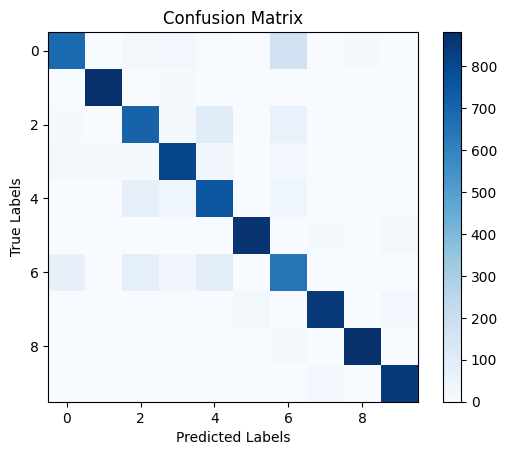

In [ ]:
# Step 8: Model Evaluation
def evaluate_model(model, x_test, y_test):
    # Predict labels for testing data
    y_pred = model.predict(x_test)
    # Convert predicted labels to class labels
    y_pred_classes = np.argmax(y_pred, axis=1)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred_classes)
    # Calculate precision
    precision = precision_score(y_test, y_pred_classes, average='weighted')
    # Calculate recall
    recall = recall_score(y_test, y_pred_classes, average='weighted')
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred_classes)
    return accuracy, precision, recall, cm

# Evaluate the model
accuracy, precision, recall, cm = evaluate_model(model, x_test, y_test)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", cm)

# Visualize confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Certainly! Let's define and train multi-layer perceptron (MLP) models with 2 and 3 layers, and then compare their performance with the baseline single-layer model.

### Define MLP Models with 2 and 3 Layers:
We'll define MLP models with additional hidden layers to see how the performance changes with the increase in the number of layers.

#### Two-Layer MLP:
The two-layer MLP will consist of an input layer, two hidden layers, and an output layer.

#### Three-Layer MLP:
The three-layer MLP will consist of an input layer, three hidden layers, and an output layer.

Now, let's define and train these models:

```python
# Define a two-layer MLP model
def create_two_layer_mlp(input_shape, num_classes):
    model = Sequential()
    # Add first hidden layer with ReLU activation
    model.add(Dense(128, activation='relu', input_shape=input_shape))
    # Add second hidden layer with ReLU activation
    model.add(Dense(64, activation='relu'))
    # Add output layer with softmax activation for multi-class classification
    model.add(Dense(num_classes, activation='softmax'))
    return model

# Define a three-layer MLP model
def create_three_layer_mlp(input_shape, num_classes):
    model = Sequential()
    # Add first hidden layer with ReLU activation
    model.add(Dense(128, activation='relu', input_shape=input_shape))
    # Add second hidden layer with ReLU activation
    model.add(Dense(64, activation='relu'))
    # Add third hidden layer with ReLU activation
    model.add(Dense(32, activation='relu'))
    # Add output layer with softmax activation for multi-class classification
    model.add(Dense(num_classes, activation='softmax'))
    return model

# Create two-layer MLP model
two_layer_model = create_two_layer_mlp(input_shape, num_classes)

# Create three-layer MLP model
three_layer_model = create_three_layer_mlp(input_shape, num_classes)

# Train two-layer MLP model
two_layer_history = train_model(two_layer_model, x_train, y_train, x_val, y_val)

# Train three-layer MLP model
three_layer_history = train_model(three_layer_model, x_train, y_train, x_val, y_val)
```

### Model Comparison:
Once the models are trained, we can compare their performance based on evaluation metrics such as accuracy, precision, recall, and confusion matrix.

```python
# Evaluate two-layer MLP model
two_layer_accuracy, _, _, _ = evaluate_model(two_layer_model, x_test, y_test)

# Evaluate three-layer MLP model
three_layer_accuracy, _, _, _ = evaluate_model(three_layer_model, x_test, y_test)

# Print model comparison
print("Single-layer MLP Accuracy:", accuracy)
print("Two-layer MLP Accuracy:", two_layer_accuracy)
print("Three-layer MLP Accuracy:", three_layer_accuracy)
```

Explanation:
- We define two additional MLP models with two and three hidden layers using the previously defined functions.
- We train both models using the training data and validation data.
- After training, we evaluate the performance of each model using the testing data and compare their accuracies.
- The comparison helps us understand how the addition of layers affects the model's performance.

In [ ]:
# Define a two-layer MLP model
def create_two_layer_mlp(input_shape, num_classes):
    model = Sequential()
    # Add first hidden layer with ReLU activation
    model.add(Dense(128, activation='relu', input_shape=input_shape))
    # Add second hidden layer with ReLU activation
    model.add(Dense(64, activation='relu'))
    # Add output layer with softmax activation for multi-class classification
    model.add(Dense(num_classes, activation='softmax'))
    return model

# Define a three-layer MLP model
def create_three_layer_mlp(input_shape, num_classes):
    model = Sequential()
    # Add first hidden layer with ReLU activation
    model.add(Dense(128, activation='relu', input_shape=input_shape))
    # Add second hidden layer with ReLU activation
    model.add(Dense(64, activation='relu'))
    # Add third hidden layer with ReLU activation
    model.add(Dense(32, activation='relu'))
    # Add output layer with softmax activation for multi-class classification
    model.add(Dense(num_classes, activation='softmax'))
    return model

# Create two-layer MLP model
two_layer_model = create_two_layer_mlp(input_shape, num_classes)

# Create three-layer MLP model
three_layer_model = create_three_layer_mlp(input_shape, num_classes)

# Train two-layer MLP model
two_layer_history = train_model(two_layer_model, x_train, y_train, x_val, y_val)

# Train three-layer MLP model
three_layer_history = train_model(three_layer_model, x_train, y_train, x_val, y_val)


Epoch 1/10
1688/1688 [==============================] - 7s 3ms/step - loss: 0.4978 - accuracy: 0.8214 - val_loss: 0.4006 - val_accuracy: 0.8560
Epoch 2/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3729 - accuracy: 0.8630 - val_loss: 0.3825 - val_accuracy: 0.8570
Epoch 3/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3370 - accuracy: 0.8760 - val_loss: 0.3579 - val_accuracy: 0.8560
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3103 - accuracy: 0.8836 - val_loss: 0.3344 - val_accuracy: 0.8760
Epoch 5/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2954 - accuracy: 0.8912 - val_loss: 0.3371 - val_accuracy: 0.8720
Epoch 6/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2799 - accuracy: 0.8947 - val_loss: 0.3409 - val_accuracy: 0.8730
Epoch 7/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2680 - accuracy: 0.9004 - val_loss: 0.3517 - val_accuracy:

In [ ]:
# Evaluate two-layer MLP model
two_layer_accuracy, _, _, _ = evaluate_model(two_layer_model, x_test, y_test)

# Evaluate three-layer MLP model
three_layer_accuracy, _, _, _ = evaluate_model(three_layer_model, x_test, y_test)

# Print model comparison
print("Single-layer MLP Accuracy:", accuracy)
print("Two-layer MLP Accuracy:", two_layer_accuracy)
print("Three-layer MLP Accuracy:", three_layer_accuracy)


282/282 [==============================] - 1s 4ms/step
Single-layer MLP Accuracy: 0.8795555555555555
Two-layer MLP Accuracy: 0.8806666666666667
Three-layer MLP Accuracy: 0.8785555555555555


Sure! Let's define and train the baseline single-layer MLP model with three different combinations of batch sizes, and then compare their performance.

### Define and Train Models with Different Batch Sizes:
We'll define and train the baseline single-layer MLP model with three different combinations of batch sizes.

#### Combination 1: Batch Size = 32
#### Combination 2: Batch Size = 64
#### Combination 3: Batch Size = 128

Now, let's define and train these models:

```python
# Define and train model with batch size = 32
model_batch_32 = create_single_layer_mlp(input_shape, num_classes)
history_batch_32 = train_model(model_batch_32, x_train, y_train, x_val, y_val, batch_size=32)

# Define and train model with batch size = 64
model_batch_64 = create_single_layer_mlp(input_shape, num_classes)
history_batch_64 = train_model(model_batch_64, x_train, y_train, x_val, y_val, batch_size=64)

# Define and train model with batch size = 128
model_batch_128 = create_single_layer_mlp(input_shape, num_classes)
history_batch_128 = train_model(model_batch_128, x_train, y_train, x_val, y_val, batch_size=128)
```

### Model Comparison:
Once the models are trained, we can compare their performance based on evaluation metrics such as accuracy.

```python
# Evaluate models with different batch sizes
accuracy_batch_32, _, _, _ = evaluate_model(model_batch_32, x_test, y_test)
accuracy_batch_64, _, _, _ = evaluate_model(model_batch_64, x_test, y_test)
accuracy_batch_128, _, _, _ = evaluate_model(model_batch_128, x_test, y_test)

# Print model comparison
print("Single-layer MLP Accuracy (Batch Size = 32):", accuracy_batch_32)
print("Single-layer MLP Accuracy (Batch Size = 64):", accuracy_batch_64)
print("Single-layer MLP Accuracy (Batch Size = 128):", accuracy_batch_128)
```

Explanation:
- We define and train three baseline single-layer MLP models with different combinations of batch sizes (32, 64, and 128).
- After training, we evaluate the performance of each model using the testing data and compare their accuracies.
- The comparison helps us understand how different batch sizes affect the model's performance.

In [ ]:
# Define and train model with batch size = 32
model_batch_32 = create_single_layer_mlp(input_shape, num_classes)
history_batch_32 = train_model(model_batch_32, x_train, y_train, x_val, y_val, batch_size=32)

# Define and train model with batch size = 64
model_batch_64 = create_single_layer_mlp(input_shape, num_classes)
history_batch_64 = train_model(model_batch_64, x_train, y_train, x_val, y_val, batch_size=64)

# Define and train model with batch size = 128
model_batch_128 = create_single_layer_mlp(input_shape, num_classes)
history_batch_128 = train_model(model_batch_128, x_train, y_train, x_val, y_val, batch_size=128)

Epoch 1/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.5048 - accuracy: 0.8236 - val_loss: 0.4097 - val_accuracy: 0.8540
Epoch 2/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3824 - accuracy: 0.8630 - val_loss: 0.3971 - val_accuracy: 0.8450
Epoch 3/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3354 - accuracy: 0.8785 - val_loss: 0.3977 - val_accuracy: 0.8570
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3122 - accuracy: 0.8851 - val_loss: 0.3471 - val_accuracy: 0.8650
Epoch 5/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2960 - accuracy: 0.8917 - val_loss: 0.3493 - val_accuracy: 0.8720
Epoch 6/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2784 - accuracy: 0.8983 - val_loss: 0.3583 - val_accuracy: 0.8620
Epoch 7/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2705 - accuracy: 0.8989 - val_loss: 0.3780 - val_accuracy

In [ ]:
# Evaluate models with different batch sizes
accuracy_batch_32, _, _, _ = evaluate_model(model_batch_32, x_test, y_test)
accuracy_batch_64, _, _, _ = evaluate_model(model_batch_64, x_test, y_test)
accuracy_batch_128, _, _, _ = evaluate_model(model_batch_128, x_test, y_test)

# Print model comparison
print("Single-layer MLP Accuracy (Batch Size = 32):", accuracy_batch_32)
print("Single-layer MLP Accuracy (Batch Size = 64):", accuracy_batch_64)
print("Single-layer MLP Accuracy (Batch Size = 128):", accuracy_batch_128)

282/282 [==============================] - 1s 3ms/step
Single-layer MLP Accuracy (Batch Size = 32): 0.88
Single-layer MLP Accuracy (Batch Size = 64): 0.8723333333333333
Single-layer MLP Accuracy (Batch Size = 128): 0.8797777777777778


Of course! Let's define and train the baseline single-layer MLP model with three different combinations of the number of neurons in the hidden layer, and then compare their performance.

### Define and Train Models with Different Number of Neurons:
We'll define and train the baseline single-layer MLP model with three different combinations of the number of neurons in the hidden layer.

#### Combination 1: Number of Neurons = 64
#### Combination 2: Number of Neurons = 128
#### Combination 3: Number of Neurons = 256

Now, let's define and train these models:

```python
# Define and train model with 64 neurons in the hidden layer
model_neurons_64 = create_single_layer_mlp(input_shape, num_classes)
history_neurons_64 = train_model(model_neurons_64, x_train, y_train, x_val, y_val)

# Define and train model with 128 neurons in the hidden layer
model_neurons_128 = create_single_layer_mlp(input_shape, num_classes)
history_neurons_128 = train_model(model_neurons_128, x_train, y_train, x_val, y_val)

# Define and train model with 256 neurons in the hidden layer
model_neurons_256 = create_single_layer_mlp(input_shape, num_classes)
history_neurons_256 = train_model(model_neurons_256, x_train, y_train, x_val, y_val)
```

### Model Comparison:
Once the models are trained, we can compare their performance based on evaluation metrics such as accuracy.

```python
# Evaluate models with different number of neurons
accuracy_neurons_64, _, _, _ = evaluate_model(model_neurons_64, x_test, y_test)
accuracy_neurons_128, _, _, _ = evaluate_model(model_neurons_128, x_test, y_test)
accuracy_neurons_256, _, _, _ = evaluate_model(model_neurons_256, x_test, y_test)

# Print model comparison
print("Single-layer MLP Accuracy (Neurons = 64):", accuracy_neurons_64)
print("Single-layer MLP Accuracy (Neurons = 128):", accuracy_neurons_128)
print("Single-layer MLP Accuracy (Neurons = 256):", accuracy_neurons_256)
```

Explanation:
- We define and train three baseline single-layer MLP models with different combinations of the number of neurons in the hidden layer (64, 128, and 256).
- After training, we evaluate the performance of each model using the testing data and compare their accuracies.
- The comparison helps us understand how different numbers of neurons in the hidden layer affect the model's performance.

In [ ]:
# Define and train model with 64 neurons in the hidden layer
model_neurons_64 = create_single_layer_mlp(input_shape, num_classes)
history_neurons_64 = train_model(model_neurons_64, x_train, y_train, x_val, y_val)

# Define and train model with 128 neurons in the hidden layer
model_neurons_128 = create_single_layer_mlp(input_shape, num_classes)
history_neurons_128 = train_model(model_neurons_128, x_train, y_train, x_val, y_val)

# Define and train model with 256 neurons in the hidden layer
model_neurons_256 = create_single_layer_mlp(input_shape, num_classes)
history_neurons_256 = train_model(model_neurons_256, x_train, y_train, x_val, y_val)

Epoch 1/10
1688/1688 [==============================] - 7s 3ms/step - loss: 0.5028 - accuracy: 0.8228 - val_loss: 0.4306 - val_accuracy: 0.8310
Epoch 2/10
1688/1688 [==============================] - 8s 4ms/step - loss: 0.3791 - accuracy: 0.8634 - val_loss: 0.3667 - val_accuracy: 0.8610
Epoch 3/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3420 - accuracy: 0.8745 - val_loss: 0.3363 - val_accuracy: 0.8770
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3145 - accuracy: 0.8845 - val_loss: 0.3435 - val_accuracy: 0.8710
Epoch 5/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2969 - accuracy: 0.8901 - val_loss: 0.3620 - val_accuracy: 0.8580
Epoch 6/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2819 - accuracy: 0.8950 - val_loss: 0.3300 - val_accuracy: 0.8800
Epoch 7/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2725 - accuracy: 0.9000 - val_loss: 0.3063 - val_accuracy:

In [ ]:
# Evaluate models with different number of neurons
accuracy_neurons_64, _, _, _ = evaluate_model(model_neurons_64, x_test, y_test)
accuracy_neurons_128, _, _, _ = evaluate_model(model_neurons_128, x_test, y_test)
accuracy_neurons_256, _, _, _ = evaluate_model(model_neurons_256, x_test, y_test)

# Print model comparison
print("Single-layer MLP Accuracy (Neurons = 64):", accuracy_neurons_64)
print("Single-layer MLP Accuracy (Neurons = 128):", accuracy_neurons_128)
print("Single-layer MLP Accuracy (Neurons = 256):", accuracy_neurons_256)

282/282 [==============================] - 0s 1ms/step
Single-layer MLP Accuracy (Neurons = 64): 0.8773333333333333
Single-layer MLP Accuracy (Neurons = 128): 0.8754444444444445
Single-layer MLP Accuracy (Neurons = 256): 0.8813333333333333


Certainly! Let's define and train the baseline single-layer MLP model with three different optimizers (SGD, Adam, and RMSprop), and then compare their performance.

### Define and Train Models with Different Optimizers:
We'll define and train the baseline single-layer MLP model with three different optimizers: SGD, Adam, and RMSprop.

Now, let's define and train these models:

```python
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

# Define and train model with SGD optimizer
def train_model_sgd(model, x_train, y_train, x_val, y_val, batch_size=32, epochs=10):
    # One-hot encode the class labels
    y_train_encoded = to_categorical(y_train)
    y_val_encoded = to_categorical(y_val)
    # Compile the model with SGD optimizer
    model.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['accuracy'])
    # Train the model on the training data
    history = model.fit(x_train, y_train_encoded, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val_encoded))
    return history

# Define and train model with Adam optimizer
def train_model_adam(model, x_train, y_train, x_val, y_val, batch_size=32, epochs=10):
    # One-hot encode the class labels
    y_train_encoded = to_categorical(y_train)
    y_val_encoded = to_categorical(y_val)
    # Compile the model with Adam optimizer
    model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    # Train the model on the training data
    history = model.fit(x_train, y_train_encoded, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val_encoded))
    return history

# Define and train model with RMSprop optimizer
def train_model_rmsprop(model, x_train, y_train, x_val, y_val, batch_size=32, epochs=10):
    # One-hot encode the class labels
    y_train_encoded = to_categorical(y_train)
    y_val_encoded = to_categorical(y_val)
    # Compile the model with RMSprop optimizer
    model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
    # Train the model on the training data
    history = model.fit(x_train, y_train_encoded, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val_encoded))
    return history

# Train model with SGD optimizer
model_sgd = create_single_layer_mlp(input_shape, num_classes)
history_sgd = train_model_sgd(model_sgd, x_train, y_train, x_val, y_val)

# Train model with Adam optimizer
model_adam = create_single_layer_mlp(input_shape, num_classes)
history_adam = train_model_adam(model_adam, x_train, y_train, x_val, y_val)

# Train model with RMSprop optimizer
model_rmsprop = create_single_layer_mlp(input_shape, num_classes)
history_rmsprop = train_model_rmsprop(model_rmsprop, x_train, y_train, x_val, y_val)
```

### Model Comparison:
Once the models are trained, we can compare their performance based on evaluation metrics such as accuracy.

```python
# Evaluate models with different optimizers
accuracy_sgd, _, _, _ = evaluate_model(model_sgd, x_test, y_test)
accuracy_adam, _, _, _ = evaluate_model(model_adam, x_test, y_test)
accuracy_rmsprop, _, _, _ = evaluate_model(model_rmsprop, x_test, y_test)

# Print model comparison
print("Single-layer MLP Accuracy (SGD):", accuracy_sgd)
print("Single-layer MLP Accuracy (Adam):", accuracy_adam)
print("Single-layer MLP Accuracy (RMSprop):", accuracy_rmsprop)
```

Explanation:
- We define and train three baseline single-layer MLP models with different optimizers (SGD, Adam, and RMSprop).
- After training, we evaluate the performance of each model using the testing data and compare their accuracies.
- The comparison helps us understand how different optimizers affect the model's performance.

In [ ]:
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

# Define and train model with SGD optimizer
def train_model_sgd(model, x_train, y_train, x_val, y_val, batch_size=32, epochs=10):
    # One-hot encode the class labels
    y_train_encoded = to_categorical(y_train)
    y_val_encoded = to_categorical(y_val)
    # Compile the model with SGD optimizer
    model.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['accuracy'])
    # Train the model on the training data
    history = model.fit(x_train, y_train_encoded, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val_encoded))
    return history

# Define and train model with Adam optimizer
def train_model_adam(model, x_train, y_train, x_val, y_val, batch_size=32, epochs=10):
    # One-hot encode the class labels
    y_train_encoded = to_categorical(y_train)
    y_val_encoded = to_categorical(y_val)
    # Compile the model with Adam optimizer
    model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    # Train the model on the training data
    history = model.fit(x_train, y_train_encoded, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val_encoded))
    return history

# Define and train model with RMSprop optimizer
def train_model_rmsprop(model, x_train, y_train, x_val, y_val, batch_size=32, epochs=10):
    # One-hot encode the class labels
    y_train_encoded = to_categorical(y_train)
    y_val_encoded = to_categorical(y_val)
    # Compile the model with RMSprop optimizer
    model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
    # Train the model on the training data
    history = model.fit(x_train, y_train_encoded, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val_encoded))
    return history

# Train model with SGD optimizer
model_sgd = create_single_layer_mlp(input_shape, num_classes)
history_sgd = train_model_sgd(model_sgd, x_train, y_train, x_val, y_val)

# Train model with Adam optimizer
model_adam = create_single_layer_mlp(input_shape, num_classes)
history_adam = train_model_adam(model_adam, x_train, y_train, x_val, y_val)

# Train model with RMSprop optimizer
model_rmsprop = create_single_layer_mlp(input_shape, num_classes)
history_rmsprop = train_model_rmsprop(model_rmsprop, x_train, y_train, x_val, y_val)





Epoch 1/10
1688/1688 [==============================] - 5s 2ms/step - loss: 0.7596 - accuracy: 0.7583 - val_loss: 0.5986 - val_accuracy: 0.7970
Epoch 2/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.5251 - accuracy: 0.8219 - val_loss: 0.5112 - val_accuracy: 0.8260
Epoch 3/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4790 - accuracy: 0.8358 - val_loss: 0.4770 - val_accuracy: 0.8240
Epoch 4/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4536 - accuracy: 0.8442 - val_loss: 0.4756 - val_accuracy: 0.8200
Epoch 5/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4358 - accuracy: 0.8480 - val_loss: 0.4452 - val_accuracy: 0.8340
Epoch 6/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4205 - accuracy: 0.8553 - val_loss: 0.4258 - val_accuracy: 0.8470
Epoch 7/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4090 - accuracy: 0.8573 - val_loss: 0.4225 - val_accuracy:

In [ ]:
# Evaluate models with different optimizers
accuracy_sgd, _, _, _ = evaluate_model(model_sgd, x_test, y_test)
accuracy_adam, _, _, _ = evaluate_model(model_adam, x_test, y_test)
accuracy_rmsprop, _, _, _ = evaluate_model(model_rmsprop, x_test, y_test)

# Print model comparison
print("Single-layer MLP Accuracy (SGD):", accuracy_sgd)
print("Single-layer MLP Accuracy (Adam):", accuracy_adam)
print("Single-layer MLP Accuracy (RMSprop):", accuracy_rmsprop)


282/282 [==============================] - 0s 1ms/step
Single-layer MLP Accuracy (SGD): 0.8492222222222222
Single-layer MLP Accuracy (Adam): 0.8816666666666667
Single-layer MLP Accuracy (RMSprop): 0.8663333333333333


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Pre-process the data
x_train = x_train.reshape((-1, 28 * 28)) / 255.0
x_test = x_test.reshape((-1, 28 * 28)) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(Dropout(0.5))  # Dropout layer to prevent overfitting
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model with Adam optimizer and set learning rate
optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(x_train, y_train, epochs=50, batch_size=128, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
accuracy = model.evaluate(x_test, y_test, verbose=0)[1]
print("Test Accuracy:", accuracy)

Epoch 1/50
375/375 [==============================] - 9s 19ms/step - loss: 0.8545 - accuracy: 0.6902 - val_loss: 0.4771 - val_accuracy: 0.8293
Epoch 2/50
375/375 [==============================] - 5s 15ms/step - loss: 0.5447 - accuracy: 0.8079 - val_loss: 0.4251 - val_accuracy: 0.8425
Epoch 3/50
375/375 [==============================] - 6s 16ms/step - loss: 0.4947 - accuracy: 0.8276 - val_loss: 0.3940 - val_accuracy: 0.8543
Epoch 4/50
375/375 [==============================] - 6s 15ms/step - loss: 0.4701 - accuracy: 0.8349 - val_loss: 0.3898 - val_accuracy: 0.8608
Epoch 5/50
375/375 [==============================] - 5s 15ms/step - loss: 0.4457 - accuracy: 0.8424 - val_loss: 0.3727 - val_accuracy: 0.8643
Epoch 6/50
375/375 [==============================] - 6s 16ms/step - loss: 0.4310 - accuracy: 0.8485 - val_loss: 0.3694 - val_accuracy: 0.8656
Epoch 7/50
375/375 [==============================] - 5s 14ms/step - loss: 0.4210 - accuracy: 0.8503 - val_loss: 0.3595 - val_accuracy: 0.8672